# Exploring the Rappers Dataset

## Data collection
The dataset we will be using is information collected on rappers from Google searches. To be clear, these data were chosen with a lot of bias. I lack plenty of hip-hop history, and I am a big fan of rap, therefore I have my favorites who are probably represented in the dataset. The first 30 or so artists (lazy to figure it out at this point) were chosen off the top of my head. The rest were chosen from looking at lists found under the search query of "best rappers" and "most influential rappers". Net worth and height were recorded from the Google hint that appeared after searching artist names then the word "net worth" or "height". The rest of the information was taken from their Wikipedia pages. If no origin/hometown was specified, then their place of birth was taken as origin state.

## Load in Data
The dataset is called `rappers.csv` and is downloadable for you to do your own practice on! Let's load in the data and take a look.

In [1]:
library(readr)

In [2]:
rappers <- read_csv("../data/rappers.csv")

Parsed with column specification:
cols(
  artist_name = col_character(),
  legal_name = col_character(),
  birth_year = col_integer(),
  origin = col_character(),
  net_worth = col_double(),
  start_year = col_integer(),
  deceased = col_logical(),
  height = col_character()
)


### Column variables
The columns within `rappers` represent values for the following variables.

In [3]:
names(rappers)

[1] "artist_name" "legal_name"  "birth_year"  "origin"      "net_worth"  
[6] "start_year"  "deceased"    "height"

We can try to summarize and visualize our dataset.

## Dataframe manipulation
We're going to use the library `dplyr` to calculate some interesting summaries. Take a look at the following chunks and see what they're doing.

In [4]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Using mutate to apply a function
Often times, data will come to us in a format that isn't easy to work with in R like getting a height in the format of 5'2" instead fo 5.1667 feet. Our next goal will be to convert the `height` column into decimal format. To do this we will use `mutate()` to apply the function called `height_to_decimal`. Don't worry about coding the following function. Just take it as a given.

In [5]:
# * DON'T WORRY ABOUT THIS CHUNK :D
height_to_decimal <- function(this_height) {
    numeric <- sapply(strsplit(gsub("\"", "", as.character(this_height)), "\'"), as.numeric)
    numeric[1] + (numeric[2] / 12)
}
height_to_decimal <- Vectorize(height_to_decimal, vectorize.args="this_height")

Recall, we can use `mutate()` to take an existing column and create a new one based off of the values of the existing one. Take a look at the new column we tacked on to the very right side. Also notice that **I overwrote my previous dataframe with my updated version that contains the `height_decimal` column using the assignment operator.**

In [6]:
rappers <- rappers %>% mutate(height_decimal=height_to_decimal(height))
rappers <- rappers %>% mutate(height_decimal=as.numeric(height_decimal))
head(rappers)

artist_name,legal_name,birth_year,origin,net_worth,start_year,deceased,height,height_decimal
Nicki-Minaj,Onika-Maraj,1982,New-York,75,2004,FALSE,"5'2""",5.166667
Jay-Z,Shawn-Carter,1969,New-York,900,1986,FALSE,"6'2""",6.166667
Eminem,Marshall-Mathers,1972,Missouri,190,1988,FALSE,"5'8""",5.666667
Kendrick-Lamar,Kendrick-Duckworth,1987,California,45,2003,FALSE,"5'6""",5.500000
Logic,Robert-Hall,1990,Maryland,10,2009,FALSE,"5'9""",5.750000
E-40,Earl-Stevens,1967,California,10,1986,FALSE,"6'1""",6.083333


### Using mutate again for something simpler
The last example can be a little confusing if you look at the chunk I told you not to look at. Haha. To reiterate how to use `mutate()`, we're going to now calculate each artist's year (rounded to the start of the year) and each artist's number of active years. (For now, we will not worry about whether or not a rapper is still around on this Earth.)

In [7]:
rappers <- rappers %>% mutate(age=2019-birth_year,
                              active=2019-start_year)
head(rappers)

artist_name,legal_name,birth_year,origin,net_worth,start_year,deceased,height,height_decimal,age,active
Nicki-Minaj,Onika-Maraj,1982,New-York,75,2004,FALSE,"5'2""",5.166667,37,15
Jay-Z,Shawn-Carter,1969,New-York,900,1986,FALSE,"6'2""",6.166667,50,33
Eminem,Marshall-Mathers,1972,Missouri,190,1988,FALSE,"5'8""",5.666667,47,31
Kendrick-Lamar,Kendrick-Duckworth,1987,California,45,2003,FALSE,"5'6""",5.500000,32,16
Logic,Robert-Hall,1990,Maryland,10,2009,FALSE,"5'9""",5.750000,29,10
E-40,Earl-Stevens,1967,California,10,1986,FALSE,"6'1""",6.083333,52,33


## Summaries
Now, we're going to make summaries and data visualizations using `dplyr` and `ggplot2`. Recall that earlier we already loaded in `dplyr`, so we're not going to do it again. We're going to use the two libraries one after the other to show how we can calculate (code) and view our data summaries.

In [8]:
library(ggplot2)

### How old are our rappers?
Birth year is discrete, numeric data.

In [9]:
rappers %>% summarize(mean_birth   = mean(birth_year),
                      median_birth = median(birth_year),
                      early_birth  = min(birth_year),
                      late_birth   = max(birth_year))

mean_birth,median_birth,early_birth,late_birth
1980.787,1980,1964,1999


Here's a boxplot of the interquartile range (IQR).

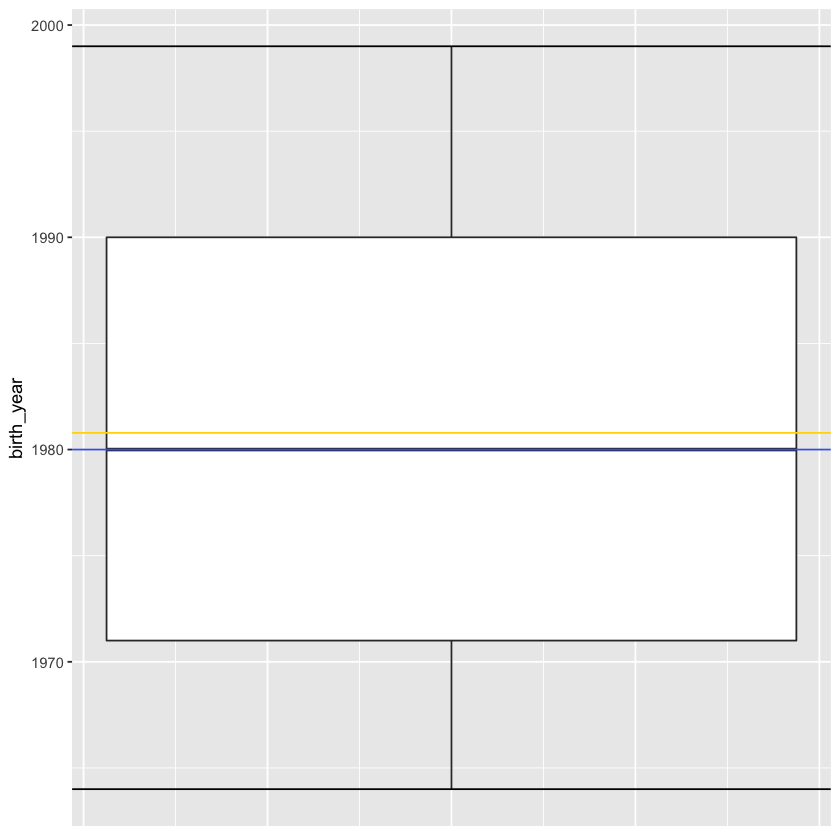

In [10]:
ggplot(rappers, aes(y=birth_year)) +
    geom_boxplot() +
    geom_hline(yintercept=1964) +
    geom_hline(yintercept=1999) +
    geom_hline(yintercept=1980.787, color="gold") +
    geom_hline(yintercept=1980, color="royalblue") +
    theme(axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank())

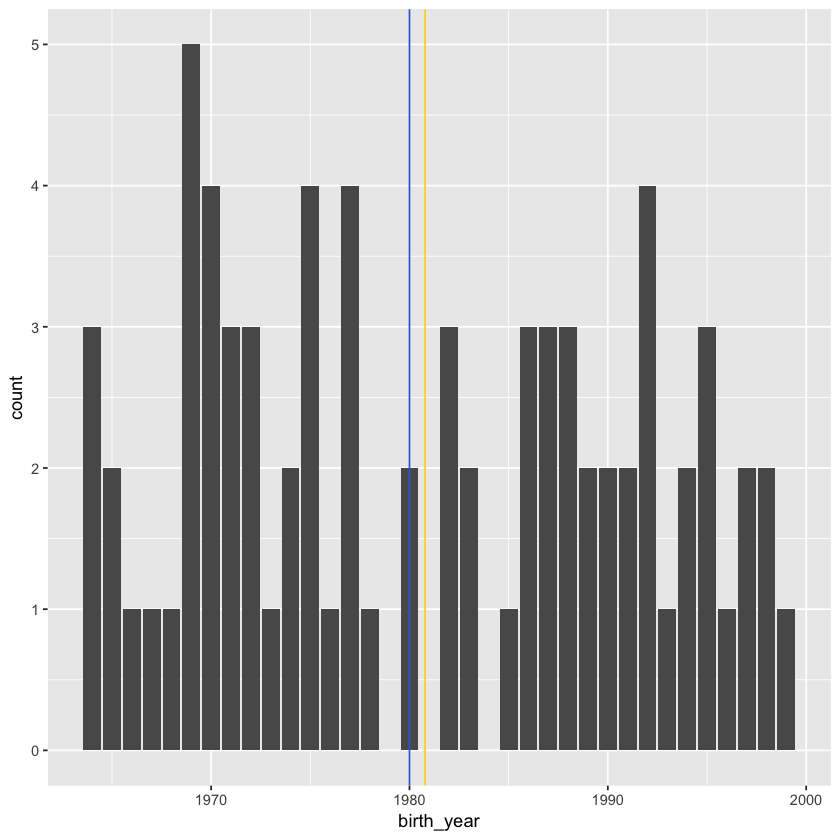

In [11]:
ggplot(rappers, aes(x=birth_year)) +
    geom_bar() +
    geom_vline(xintercept=1980.787, color="gold") +
    geom_vline(xintercept=1980, color="royalblue")

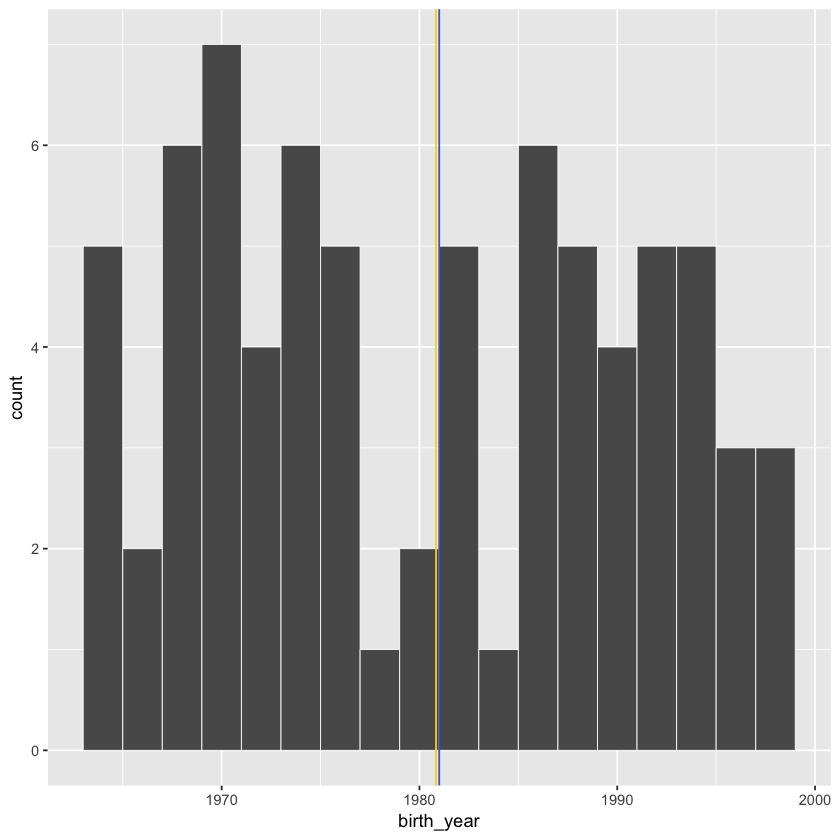

In [12]:
ggplot(rappers, aes(x=birth_year)) +
    geom_histogram(binwidth=2, col="white", lwd=0.25) +
    geom_vline(xintercept=1980.838, color="gold") +
    geom_vline(xintercept=1981, color="royalblue")

### Is Too \$hort too short?
Too $hort is one of the rappers in our dataset. Here's a little bit of information we have about him from our dataset.

In [13]:
rappers %>% filter(artist_name=="Too-$hort")

artist_name,legal_name,birth_year,origin,net_worth,start_year,deceased,height,height_decimal,age,active
Too-$hort,Todd-Shaw,1966,California,15,1984,FALSE,"5'7""",5.583333,53,35


Is Too \\$hort too short? Let's compare him to the rest of our rappers. From the above, we know he is 5'7". By the below, Too \\$hort does happen to be shorter than the first quartile of heights.

In [14]:
summary <- rappers %>% summarize(mean_height   = mean(height_decimal),
                                 median_height = median(height_decimal),
                                 short         = quantile(height_decimal, 0.25),
                                 tall          = quantile(height_decimal, 0.75))
summary

mean_height,median_height,short,tall
5.817778,5.75,5.666667,6.041667


Rapper height is a continuous variable, so we're going to use a histogram to visualize it.

In [15]:
plottable_mean   <- summary %>% pull(mean_height)
plottable_median <- summary %>% pull(median_height)
plottable_short  <- summary %>% pull(short)
plottable_tall   <- summary %>% pull(tall)

todd_shaw        <- rappers %>% filter(artist_name=="Too-$hort") %>% pull(height_decimal)

Too $hort is the solid red line. The rest of the lines match up with summary values from the IQR.

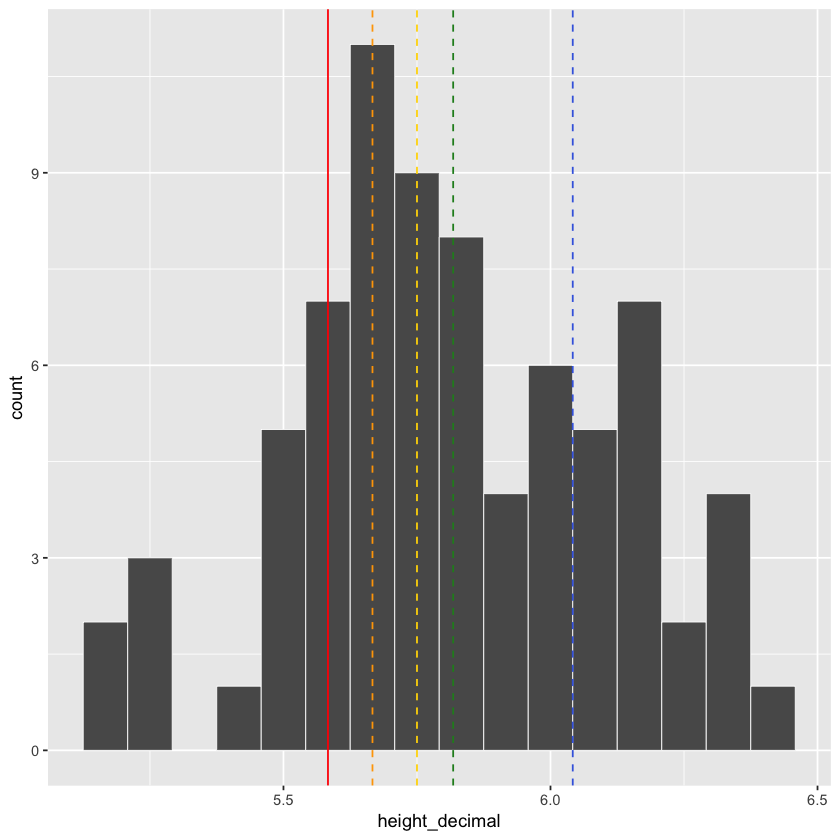

In [16]:
ggplot(rappers, aes(x=height_decimal)) +
    geom_histogram(binwidth=1/12, col="white", lwd=0.25) +
    geom_vline(xintercept=plottable_mean, color="forestgreen", lty=2) +
    geom_vline(xintercept=plottable_median, color="gold", lty=2) +
    geom_vline(xintercept=todd_shaw, color="red") +
    geom_vline(xintercept=plottable_short, color="orange", lty=2) +
    geom_vline(xintercept=plottable_tall, color="royalblue", lty=2)

### Rapper's origins
Rapper origin is a categorical variable (nominal).

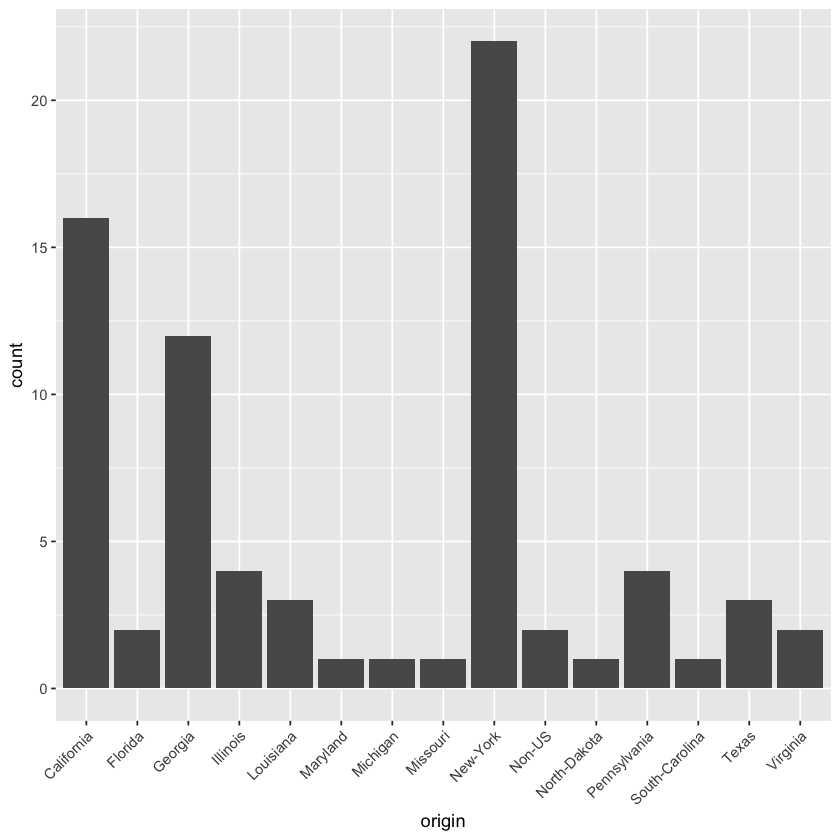

In [17]:
ggplot(rappers, aes(x=origin)) + 
    geom_bar() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [18]:
origin_summary <- rappers %>% group_by(origin) %>%
                              summarize(mean_age=mean(age),
                                        mean_net=mean(net_worth))
origin_summary

origin,mean_age,mean_net
California,44.31250,86.78125
Florida,21.50000,2.87500
Georgia,34.50000,33.75000
Illinois,28.25000,20.00000
Louisiana,45.33333,133.33333
Maryland,29.00000,10.00000
Michigan,31.00000,16.00000
Missouri,47.00000,190.00000
New-York,41.40909,102.22727
Non-US,26.50000,50.15000


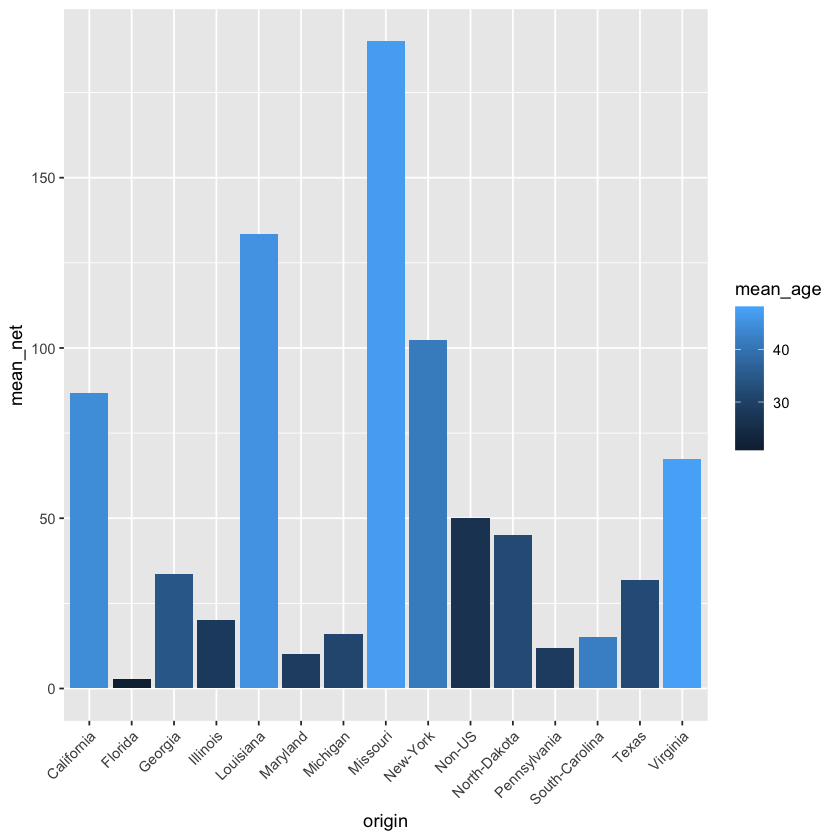

In [19]:
ggplot(origin_summary, aes(x=origin, y=mean_net, fill=mean_age)) + 
    geom_bar(stat="identity") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

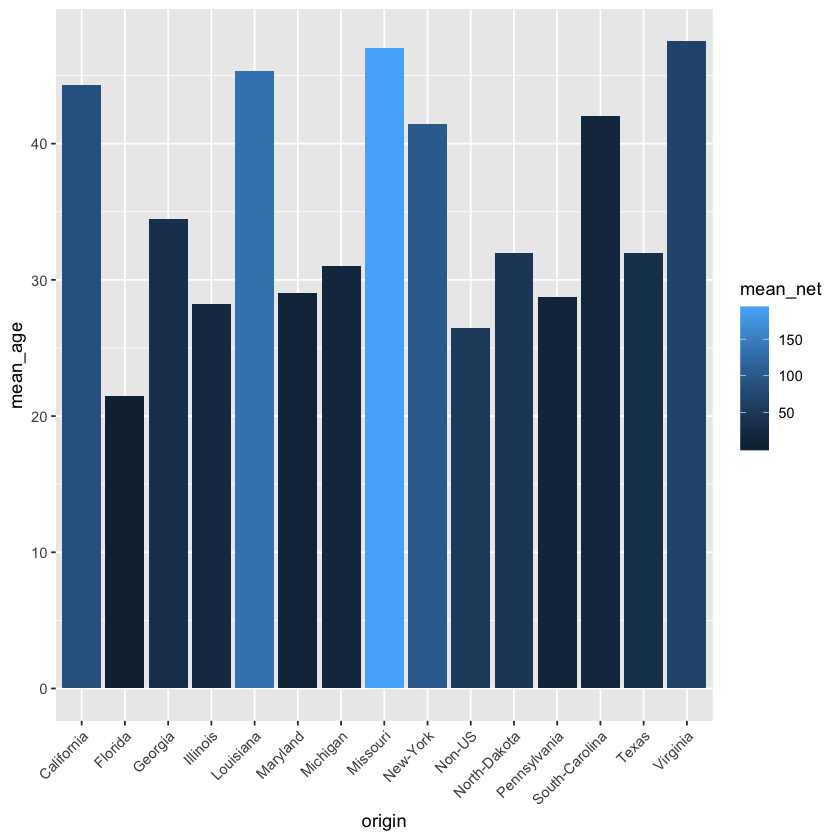

In [20]:
ggplot(origin_summary, aes(x=origin, y=mean_age, fill=mean_net)) + 
    geom_bar(stat="identity") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))